In [25]:
#loading classes and packages
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from collections import defaultdict
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [39]:
#using pandas class to read job dataset and then displaying few records
dataset = pd.read_csv('/content/DataAnalyst.csv')
dataset
dataset.info()
print("Data cleaning:")

print("Removeing Null values in the dataset:")

dataset = dataset.dropna()
print(dataset.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

Text(0, 0.5, 'Number of Different Jobs %')

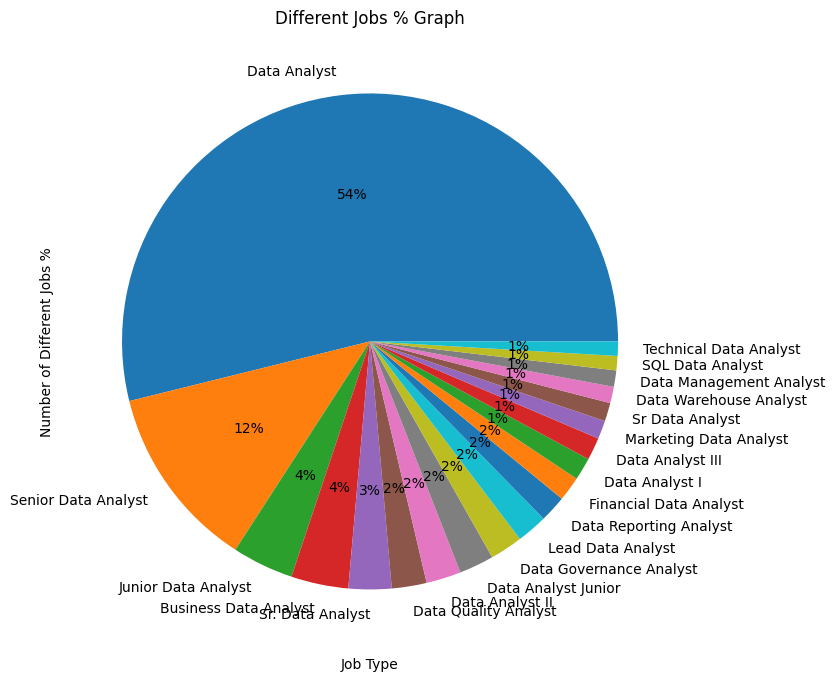

In [27]:
#finding and plotting graphs of different job titles % found in dataset
df = dataset.groupby("Job Title").size().sort_values(ascending=False).nlargest(20).reset_index()
plt.figure(figsize=(8,12))
plt.pie(df[0], labels=df['Job Title'], autopct='%.0f%%')
plt.title("Different Jobs % Graph")
plt.xlabel("Job Type")
plt.ylabel("Number of Different Jobs %")

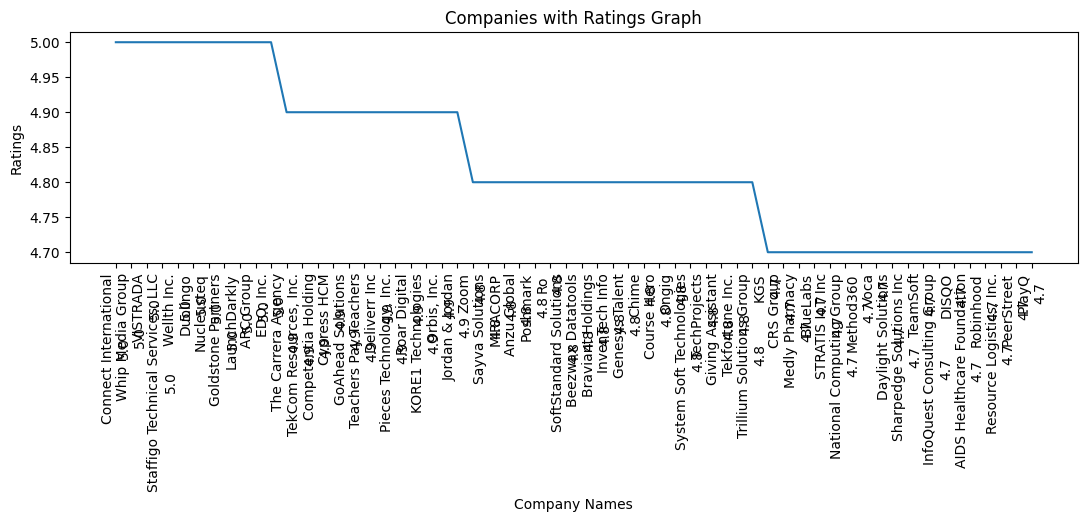

In [28]:
data = dataset.groupby(['Company Name'])['Rating'].mean().sort_values(ascending=False).nlargest(250).reset_index()
data = data.iloc[50:110]
plt.figure(figsize=(13,3))
plt.plot(data['Company Name'], data['Rating'])
plt.title("Companies with Ratings Graph")
plt.xlabel("Company Names")
plt.ylabel("Ratings")
plt.xticks(rotation=90)
plt.show()

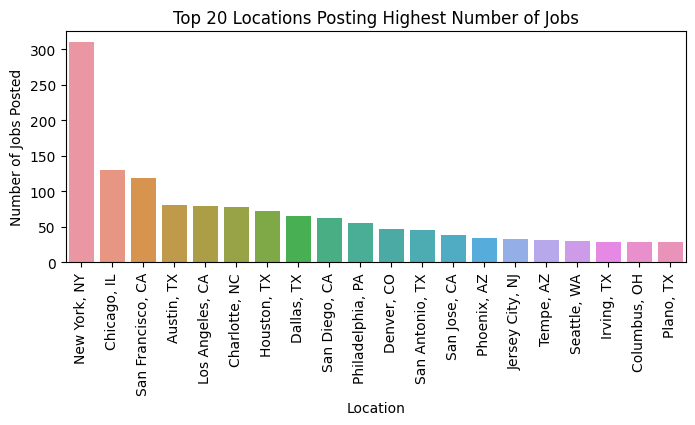

In [29]:
#dataset posted from different locations
df = dataset.groupby('Location').size().sort_values(ascending=False).nlargest(20).reset_index()
plt.figure(figsize=(8,3))
seaborn.barplot(x='Location',y=0, data=df)
plt.title('Top 20 Locations Posting Highest Number of Jobs')
plt.xlabel("Location")
plt.ylabel("Number of Jobs Posted")
plt.xticks(rotation=90)
plt.show()

In [30]:
#different job skills and description
job = dataset["Job Description"].tolist()
skills = []
#now identifying various families of Bigdata
big_data = ["big data", "hadoop", "spark", "impala", "cassandra", "kafka", "hdfs", "hbase", "hive", "mongo db", 'flume', 'sqoop',
           'flink']
counter = 0
big_data_required = defaultdict()
for item in big_data:
    counter = 0
    for it in job:
        if item in it.lower():
            counter = counter + 1
            skills.append([it])
    big_data_required[item] = counter
big_data_df = pd.DataFrame(list(big_data_required.items()),columns = ['Big Data Technologies','Skills Requirement'])
big_data_df.sort_values(['Skills Requirement'], axis=0, ascending=False, inplace=True)
big_data_df

,Big Data Technologies,Skills Requirement
0,big data,167
1,hadoop,136
8,hive,91
2,spark,89
6,hdfs,18
5,kafka,16
3,impala,15
7,hbase,11
4,cassandra,8
11,sqoop,8


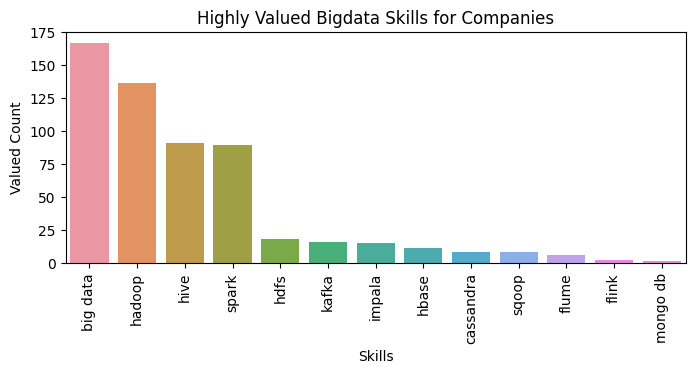

In [31]:
#graph of highly valued bigdata skills required by companies
plt.figure(figsize=(8,3))
seaborn.barplot(x='Big Data Technologies',y='Skills Requirement', data=big_data_df)
plt.title('Highly Valued Bigdata Skills for Companies')
plt.xlabel("Skills")
plt.ylabel("Valued Count")
plt.xticks(rotation=90)
plt.show()

In [8]:
#displaying description and skills for each Bigdata family
df = pd.DataFrame(skills, columns=['Descriptions & Bigdata Skills'])
pd.set_option('display.max_colwidth', None)
df

Descriptions & Bigdata Skills
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         The Data Analyst is an integral member of the global commercial data and analytics team driving commercial insights and opportunities for the world's largest English language newspaper website, DailyMail.com. This is a unique opportunity to work in a fast-paced entrepreneurial environment, with wide exposure to ad-tech and big data platforms.\n\nThe Data Analyst will be responsible for maintaining and optimizing the global commercial data systems, identifying methods to maximize commercial performance and providing business insights to internal stakeholders. This individual will have a genuine passion for digital media and data technology.\n\nDailyMail.com is a division of UK-based DMGT, an international portfolio of digital, information, media and events businesses, which employs over 12,000 people and is listed on the London Stock Exchange (LSE:DMGT.L).\n\nSpecific Responsibilities\nParticipate in cross-functional projects using advanced data modeling and analysis techniques to discover insights that will guide strategic decisions and uncover optimization opportunities.\nDevelop and maintain big data infrastructure, reporting systems and data models that support key business decisions.\nDevelop and maintain data visualization dashboards to allow data access to necessary stakeholders.\nEvaluate the configuration and performance of commercial practices against key indicators.\nContinuously monitor yield across platforms and offer innovative recommendations to internal teams to boost performance and generate new revenue.\nWork cross-functionally with teams including Operations, Sales, Marketing, Finance and Analytics to provide e

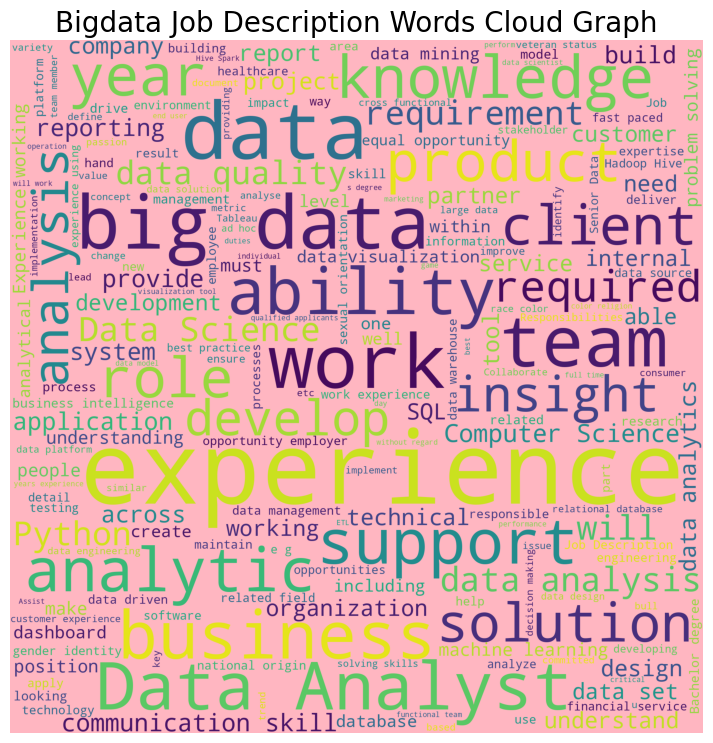

In [9]:
wordCloud = WordCloud(background_color = 'lightpink',width=2000,height= 2000).generate(' '.join(df['Descriptions & Bigdata Skills']))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title('Bigdata Job Description Words Cloud Graph',fontsize=20)
plt.imshow(wordCloud)
plt.show()